 #Credit Card Fraud Detection using DeepLearning 

In [52]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,fbeta_score,classification_report,confusion_matrix,precision_recall_curve,roc_auc_score\
    ,roc_curve
from subprocess import check_output
%matplotlib inline

In [53]:
from __future__ import division, print_function, absolute_import
import tflearn
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.normalization import batch_normalization, local_response_normalization
from tflearn.layers.estimator import regression

import tensorflow as tf

import numpy as np
import pandas as pd

from sklearn import preprocessing

from sklearn.decomposition import PCA

from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.cluster import KMeans

In [54]:
data=pd.read_csv("/home/dinesh/Downloads/creditcard.csv")

In [55]:
data_fraud=data[data["Class"]==1]
data_non_fraud=data[data["Class"]==0]

In [56]:
data_fraud.shape, data_non_fraud.shape

((492, 31), (284315, 31))

In [59]:
from sklearn.model_selection import train_test_split
data_fraud_train, data_fraud_test=train_test_split(data_fraud,test_size=0.2, shuffle=False)
data_non_fraud_train, data_non_fraud_test=train_test_split(data_non_fraud,test_size=0.2, shuffle=False)

In [60]:
data_fraud_train.shape, data_fraud_test.shape, data_non_fraud_train.shape, data_non_fraud_test.shape

((393, 31), (99, 31), (227452, 31), (56863, 31))

In [61]:
data_train=pd.concat([data_fraud_train,data_non_fraud_train])
data_test=pd.concat([data_fraud_test,data_non_fraud_test])

In [62]:
data_train.shape

(227845, 31)

In [63]:
df_full=data_train

In [64]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [65]:
#df_full = pd.read_csv("/home/dinesh/Downloads/creditcard.csv")
df_full.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [66]:
df_full.Class.value_counts() 

0    227452
1       393
Name: Class, dtype: int64

In [67]:
df_full.sort_values(by='Class', ascending=False, inplace=True) 
df_full.drop('Time', axis=1,  inplace = True)

In [68]:
df_full.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
142557,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,-0.546890,-0.713474,...,0.325575,0.014002,0.844946,0.114963,0.156365,-0.619437,-0.120351,0.035594,354.33,1
141260,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,1.205868,-4.382713,-8.337707,...,1.376938,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081,512.25,1
141259,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,1.205868,-4.382713,-8.337707,...,1.376938,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081,512.25,1
141258,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,-4.322377,-8.099119,...,1.066550,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,0.00,1


In [69]:
df_cluster = df_full.iloc[393:,:]

In [70]:
df_cluster.shape

(227452, 30)

In [71]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [35]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

K = range(1,20)
KM = [KMeans(n_clusters=k).fit(df_cluster) for k in K]
centroids = [k.cluster_centers_ for k in KM]

KeyboardInterrupt: 

In [11]:
D_k = [cdist(df_cluster, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/df_cluster.shape[0] for d in dist]

In [ ]:
pdist(df_cluster,'euclidean')

Text(0.5,0,'Number of clusters')

Text(0,0.5,'Average within-cluster sum of squares')

Text(0.5,1,'Elbow for KMeans clustering')

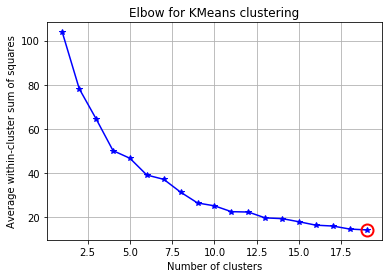

In [12]:
# elbow curve

kIdx = 20-2
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

In [72]:
kmeans=KMeans(n_clusters=10)

In [73]:
kmeans.fit(df_cluster.drop("Class",axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [74]:
k=10
labels = pd.Series(kmeans.labels_)
centroids = kmeans.cluster_centers_

In [75]:
df_cluster['clust']=labels

/home/dinesh/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
df_cluster.clust.value_counts()

1.0    159482
9.0     41058
8.0     15079
0.0      6559
4.0      2846
6.0      1241
2.0       495
5.0       222
3.0        48
7.0         5
Name: clust, dtype: int64

In [77]:
df_cluster_0=df_cluster.loc[df_cluster['clust'] == 0.0]
df_cluster_1=df_cluster.loc[df_cluster['clust'] == 1.0]
df_cluster_2=df_cluster.loc[df_cluster['clust'] == 2.0]
df_cluster_3=df_cluster.loc[df_cluster['clust'] == 3.0]
df_cluster_4=df_cluster.loc[df_cluster['clust'] == 4.0]
df_cluster_5=df_cluster.loc[df_cluster['clust'] == 5.0]
df_cluster_6=df_cluster.loc[df_cluster['clust'] == 6.0]
df_cluster_7=df_cluster.loc[df_cluster['clust'] == 7.0]
df_cluster_8=df_cluster.loc[df_cluster['clust'] == 8.0]
df_cluster_9=df_cluster.loc[df_cluster['clust'] == 9.0]

In [78]:
#df_sample_cluster=pd.concat([df_cluster_3.sample(frac=0.01),df_cluster_0.sample(frac=0.01),df_cluster_7.sample(frac=0.01),df_cluster_6.sample(frac=0.01),df_cluster_2.sample(frac=0.1),df_cluster_8.sample(frac=0.1),df_cluster_1,df_cluster_5,df_cluster_9,df_cluster_4])

df_sample_cluster=pd.concat([df_cluster_1.sample(frac=0.01),df_cluster_9.sample(frac=0.01),df_cluster_8.sample(frac=0.01),df_cluster_0.sample(frac=0.01),df_cluster_4.sample(frac=0.1),df_cluster_6.sample(frac=0.1),df_cluster_2,df_cluster_3,df_cluster_7,df_cluster_5])

In [79]:
df_sample_cluster.shape

(3402, 31)

In [80]:
df_sample_cluster.clust.value_counts()

1.0    1595
2.0     495
9.0     411
4.0     285
5.0     222
8.0     151
6.0     124
0.0      66
3.0      48
7.0       5
Name: clust, dtype: int64

In [81]:
df_sample_cluster.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,clust
199934,-0.257022,0.926352,-0.696905,-1.012072,0.803521,0.161527,0.400225,0.605277,-0.213930,-0.437131,...,-0.832947,0.043502,-0.396128,-0.374679,0.160215,0.101116,0.018917,8.99,0,1.0
192552,2.236114,-0.511869,-2.080279,-0.895475,-0.041324,-1.711956,0.304936,-0.625108,-0.999185,0.911978,...,1.036502,-0.087879,-0.013321,0.442594,0.084730,-0.078165,-0.078742,31.00,0,1.0
98993,-0.801219,1.249365,1.179805,1.261428,-0.220622,0.228266,0.168084,0.680274,-0.703073,-0.156973,...,0.390015,-0.073866,0.240609,-0.130435,-0.250507,0.298158,0.133746,13.85,0,1.0
223180,-0.022620,0.785036,-1.137932,-0.555141,0.209390,-0.095176,0.386935,0.541045,0.091331,-0.975526,...,-1.508874,0.575099,-0.023337,-1.332301,-0.277858,-0.202588,-0.051718,81.00,0,1.0
68072,1.002656,-1.570845,0.784708,-0.605882,-1.779542,-0.077622,-1.183360,0.130541,0.114864,0.538741,...,0.835663,-0.332157,-0.321564,0.276943,-0.014186,0.006483,0.058184,218.00,0,1.0


In [82]:
df_sample_cluster=df_sample_cluster.drop('clust',axis=1)

In [83]:
df_sample=pd.concat([df_full.iloc[:492,:],df_sample_cluster])

In [84]:
df_sample.Class.value_counts()

0    3501
1     393
Name: Class, dtype: int64

In [85]:
feature = np.array(df_sample.values[:,0:29])
label = np.array(df_sample.values[:,-1])

In [86]:

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_sample, test_size=0.2, random_state=40)
#df_train = shuffle_df[0:4000]
#df_test = shuffle_df[4000:]

In [87]:
train_feature = np.array(df_train.values[:,0:29])
train_label = np.array(df_train.values[:,-1])
test_feature = np.array(df_test.values[:,0:29])
test_label = np.array(df_test.values[:,-1])

In [88]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(train_feature)
train_feature_trans = scaler.transform(train_feature)
test_feature_trans = scaler.transform(test_feature)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [89]:
train_feature_trans.shape,test_feature_trans.shape

((3115, 29), (779, 29))

In [90]:
# Building the encoder.
encoder = tflearn.input_data(shape=[None, 29])
encoder = tflearn.fully_connected(encoder, 128)
encoder = tflearn.fully_connected(encoder, 64)

# Building the decoder.
decoder = tflearn.fully_connected(encoder, 128)
decoder = tflearn.fully_connected(decoder, 29)

In [91]:
# Regression, with mean square error.
net = tflearn.regression(decoder, optimizer='adam', learning_rate=0.001, loss='mean_square', metric=None)

In [92]:
# Training the auto encoder.
model = tflearn.DNN(net, tensorboard_verbose=0)
model.fit(train_feature_trans, train_feature_trans, n_epoch=100, validation_set=(test_feature_trans,test_feature_trans),run_id="auto_encoder", batch_size=256)

Training Step: 1299  | total loss: 0.00537 | time: 0.147s
| Adam | epoch: 100 | loss: 0.00537 -- iter: 3072/3115
Training Step: 1300  | total loss: 0.00536 | time: 1.163s
| Adam | epoch: 100 | loss: 0.00536 | val_loss: 0.00509 -- iter: 3115/3115
--


In [93]:
#encode_decode = np.array(model.predict(testX))

# New model, re-using the same session, for weights sharing.
encoding_model = tflearn.DNN(encoder, session=model.session)
#new_X = np.array(encoding_model.predict(X))
#new_testX = np.array(encoding_model.predict(testX))
new_X = np.array(model.predict(train_feature_trans))
new_testX = np.array(model.predict(test_feature_trans))

In [94]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

import matplotlib.pyplot as plt 
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()


Using TensorFlow backend.


In [95]:
model = Sequential() 

model.add(Dense(units=200, 
                input_dim=29, 
                kernel_initializer='glorot_normal', 
                activation='tanh'))
model.add(Dropout(0.0))


model.add(Dense(units=200,  
                kernel_initializer='glorot_normal', 
                activation='tanh'))
model.add(Dropout(0.0))


model.add(Dense(units=1, 
                kernel_initializer='glorot_normal',
                activation='sigmoid'))

print(model.summary()) 


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               6000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 46,401
Trainable params: 46,401
Non-trainable params: 0
_________________________________________________________________
None


Train on 622 samples, validate on 2493 samples
Epoch 1/200
0s - loss: 0.7908 - acc: 0.2476 - val_loss: 0.3561 - val_acc: 0.9005
Epoch 2/200
0s - loss: 0.3643 - acc: 0.8907 - val_loss: 0.3039 - val_acc: 0.9005
Epoch 3/200
0s - loss: 0.3288 - acc: 0.8907 - val_loss: 0.3316 - val_acc: 0.9005
Epoch 4/200
0s - loss: 0.3625 - acc: 0.8907 - val_loss: 0.3465 - val_acc: 0.9005
Epoch 5/200
0s - loss: 0.3777 - acc: 0.8907 - val_loss: 0.3392 - val_acc: 0.9005
Epoch 6/200
0s - loss: 0.3672 - acc: 0.8907 - val_loss: 0.3168 - val_acc: 0.9005
Epoch 7/200
0s - loss: 0.3413 - acc: 0.8907 - val_loss: 0.2906 - val_acc: 0.9005
Epoch 8/200
0s - loss: 0.3114 - acc: 0.8907 - val_loss: 0.2728 - val_acc: 0.9005
Epoch 9/200
0s - loss: 0.2893 - acc: 0.8907 - val_loss: 0.2719 - val_acc: 0.9005
Epoch 10/200
0s - loss: 0.2867 - acc: 0.8907 - val_loss: 0.2832 - val_acc: 0.9005
Epoch 11/200
0s - loss: 0.2947 - acc: 0.8907 - val_loss: 0.2864 - val_acc: 0.9089
Epoch 12/200
0s - loss: 0.2957 - acc: 0.8987 - val_loss: 0.2

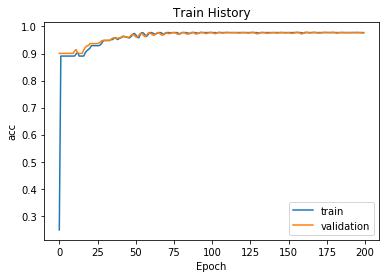

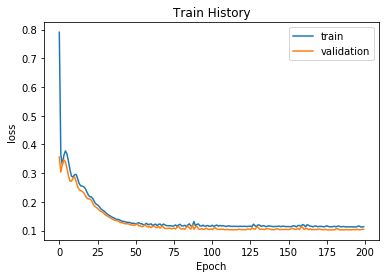

In [96]:
model.compile(loss='binary_crossentropy',   
              optimizer='adam', metrics=['accuracy'])

train_history = model.fit(x=new_X, y=train_label,  
                          validation_split=0.8, epochs=200, 
                          batch_size=500, verbose=2) 


show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')




In [97]:
new_testX.shape,test_label.shape

((779, 29), (779,))

In [98]:
scores = model.evaluate(new_testX,test_label)


576/779 [=====================>........] - ETA: 0s

In [99]:
print('\n')
print('accuracy=',scores[1])

prediction = model.predict_classes(test_feature_trans)



accuracy= 0.98074454467
 32/779 [>.............................] - ETA: 1s

In [100]:
df_ans = pd.DataFrame({'Actual' :test_label})
df_ans['Prediction'] = prediction

In [101]:
df_ans['Prediction'].value_counts()

0    716
1     63
Name: Prediction, dtype: int64

In [102]:
df_ans['Actual'].value_counts()

0.0    702
1.0     77
Name: Actual, dtype: int64

total test case number:  779


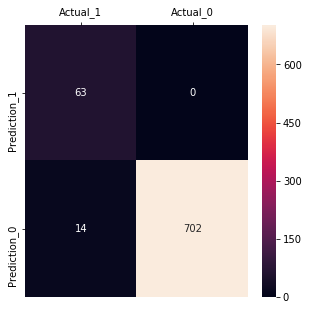

In [103]:
import seaborn as sns
%matplotlib inline

cols = ['Actual_1','Actual_0']  
rows = ['Prediction_1','Prediction_0']

TP = len(df_ans[(df_ans['Prediction'] == df_ans['Actual']) & (df_ans['Actual'] == 1)])
TN = len(df_ans[(df_ans['Prediction'] != df_ans['Actual']) & (df_ans['Actual'] == 1)])
FP = len(df_ans[(df_ans['Prediction'] != df_ans['Actual']) & (df_ans['Actual'] == 0)])
FN = len(df_ans[(df_ans['Prediction'] == df_ans['Actual']) & (df_ans['Actual'] == 0)])

conf = np.array([[TP,FP],[TN,FN]])
df_cm = pd.DataFrame(conf, columns = [i for i in cols], index = [i for i in rows])

f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(df_cm, annot=True, ax=ax, fmt='d') 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.

print('total test case number: ', np.sum(conf))

In [104]:
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    TPP=(conf[0][1]+conf[1][1])
    PTP=conf[1][1]/(conf[0][1]+conf[1][1])
    
    print('total_num: ',total_num)
    print('TP: ',conf[0][0]) 
    print('FP: ',conf[0][1])
    print('TN: ',conf[1][0])
    print('FN: ',conf[1][1])
    
    print('sensitivity/Recall: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    print('Precision: ',PTP)
    
    return total_num, sen, spe, false_positive_rate, false_negative_rate, PTP

model_efficacy(conf)

total_num:  779
TP:  63
FP:  0
TN:  14
FN:  702
sensitivity/Recall:  0.818181818182
specificity:  0.980446927374
false_positive_rate:  0.0
false_negative_rate:  0.181818181818
Precision:  1.0


(779, 0.81818181818181823, 0.98044692737430172, 0.0, 0.18181818181818182, 1.0)

In [105]:
df_sample2 = df_full.iloc[:,:] 

feature2 = np.array(df_sample2.values[:,0:29])
label2 = np.array(df_sample2.values[:,-1])

feature2_trans = scaler.transform(feature2) #using the same scaler as above


scores = model.evaluate(feature2_trans, label2)
print('\n')
print('accuracy=',scores[1])


prediction2 = model.predict_classes(feature2_trans)

227456/227845 [============================>.] - ETA: 0s

accuracy= 0.998604314337
227424/227845 [============================>.] - ETA: 0s

In [106]:
prediction2_list = prediction2.reshape(-1).astype(int)
label2_list = label2.astype(int)

print(classification_report(label2_list, prediction2_list))
print(confusion_matrix(label2_list, prediction2_list))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    227452
          1       0.57      0.79      0.66       393

avg / total       1.00      1.00      1.00    227845

[[227218    234]
 [    84    309]]


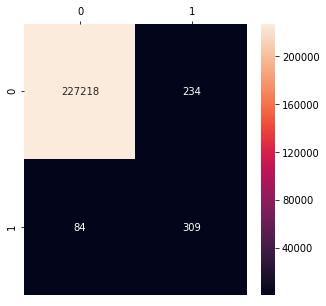

In [107]:
conf = confusion_matrix(label2_list, prediction2_list)
f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(conf, annot=True, ax=ax, fmt='d') 
ax.xaxis.set_ticks_position('top') 

In [108]:
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    TPP=(conf[0][1]+conf[1][1])
    PTP=conf[1][1]/(conf[0][1]+conf[1][1])
    F1=2*PTP*sen/(sen+PTP)
    
    print('total_num: ',total_num)
    print('TP: ',conf[0][0]) 
    print('FP: ',conf[0][1])
    print('TN: ',conf[1][0])
    print('FN: ',conf[1][1])
    
    print('sensitivity/Recall: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    print('Precision: ',PTP)
    print('F1 Score: ',F1)
    return total_num, sen, spe, false_positive_rate, false_negative_rate, PTP, F1

model_efficacy(conf)


total_num:  227845
TP:  227218
FP:  234
TN:  84
FN:  309
sensitivity/Recall:  0.999630447598
specificity:  0.786259541985
false_positive_rate:  0.430939226519
false_negative_rate:  0.000369552401651
Precision:  0.569060773481
F1 Score:  0.72525487242


(227845,
 0.99963044759834929,
 0.7862595419847328,
 0.43093922651933703,
 0.00036955240165066741,
 0.56906077348066297,
 0.72525487242015485)

### Comparing MLP perfrmance with Other models

In [110]:
from sklearn import datasets,cross_validation,ensemble

X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature_trans,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label)
clf=ensemble.AdaBoostClassifier()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature_trans,train_label))
print("Testing Score:%f"%clf.score(test_feature_trans,test_label))

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

Traing Score:0.989406
Testing Score:0.984596


In [111]:
print("Testing Score:%f"%clf.score(feature2_trans, label2))

Testing Score:0.995980


In [112]:
prediction2 = clf.predict(feature2_trans)
prediction2_list = prediction2.reshape(-1).astype(int)
label2_list = label2.astype(int)

print(classification_report(label2_list, prediction2_list))
print(confusion_matrix(label2_list, prediction2_list))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    227452
          1       0.29      0.91      0.44       393

avg / total       1.00      1.00      1.00    227845

[[226572    880]
 [    36    357]]


In [113]:
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    TPP=(conf[0][1]+conf[1][1])
    PTP=conf[1][1]/(conf[0][1]+conf[1][1])
    F1=2*PTP*sen/(sen+PTP)
    
    print('total_num: ',total_num)
    print('TP: ',conf[0][0]) 
    print('FP: ',conf[0][1])
    print('TN: ',conf[1][0])
    print('FN: ',conf[1][1])
    
    print('sensitivity/Recall: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    print('Precision: ',PTP)
    print('F1 Score: ',F1)
    return total_num, sen, spe, false_positive_rate, false_negative_rate, PTP, F1

conf = confusion_matrix(label2_list, prediction2_list)
model_efficacy(conf)

total_num:  227845
TP:  226572
FP:  880
TN:  36
FN:  357
sensitivity/Recall:  0.999841135353
specificity:  0.908396946565
false_positive_rate:  0.711398544867
false_negative_rate:  0.00015886464732
Precision:  0.288601455133
F1 Score:  0.447913797162


(227845,
 0.99984113535267949,
 0.90839694656488545,
 0.7113985448666128,
 0.00015886464732048296,
 0.28860145513338725,
 0.44791379716211227)

In [114]:
from sklearn import datasets,cross_validation,ensemble

X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature_trans,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label)
clf=ensemble.GradientBoostingClassifier()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature_trans,train_label))
print("Testing Score:%f"%clf.score(test_feature_trans,test_label))


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

Traing Score:0.993900
Testing Score:0.982028


In [115]:
print("Testing Score:%f"%clf.score(feature2_trans, label2))

Testing Score:0.993500


In [116]:
prediction2 = clf.predict(feature2_trans)
prediction2_list = prediction2.reshape(-1).astype(int)
label2_list = label2.astype(int)

print(classification_report(label2_list, prediction2_list))
print(confusion_matrix(label2_list, prediction2_list))

             precision    recall  f1-score   support

          0       1.00      0.99      1.00    227452
          1       0.20      0.94      0.33       393

avg / total       1.00      0.99      1.00    227845

[[225993   1459]
 [    22    371]]


In [117]:
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    TPP=(conf[0][1]+conf[1][1])
    PTP=conf[1][1]/(conf[0][1]+conf[1][1])
    F1=2*PTP*sen/(sen+PTP)
    
    print('total_num: ',total_num)
    print('TP: ',conf[0][0]) 
    print('FP: ',conf[0][1])
    print('TN: ',conf[1][0])
    print('FN: ',conf[1][1])
    
    print('sensitivity/Recall: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    print('Precision: ',PTP)
    print('F1 Score: ',F1)
    return total_num, sen, spe, false_positive_rate, false_negative_rate, PTP, F1

conf = confusion_matrix(label2_list, prediction2_list)
model_efficacy(conf)

total_num:  227845
TP:  225993
FP:  1459
TN:  22
FN:  371
sensitivity/Recall:  0.999902661328
specificity:  0.944020356234
false_positive_rate:  0.797267759563
false_negative_rate:  9.7338672212e-05
Precision:  0.202732240437
F1 Score:  0.337113959444


(227845,
 0.99990266132778793,
 0.94402035623409675,
 0.79726775956284157,
 9.7338672212021326e-05,
 0.20273224043715846,
 0.33711395944449257)

In [118]:
from sklearn import datasets,cross_validation,ensemble

X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature_trans,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label)
clf=ensemble.RandomForestClassifier()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature_trans,train_label))
print("Testing Score:%f"%clf.score(test_feature_trans,test_label))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Traing Score:0.993258
Testing Score:0.985879


In [119]:
print("Testing Score:%f"%clf.score(feature2_trans, label2))

Testing Score:0.997801


In [120]:
prediction2 = clf.predict(feature2_trans)
prediction2_list = prediction2.reshape(-1).astype(int)
label2_list = label2.astype(int)

print(classification_report(label2_list, prediction2_list))
print(confusion_matrix(label2_list, prediction2_list))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    227452
          1       0.44      0.92      0.59       393

avg / total       1.00      1.00      1.00    227845

[[226981    471]
 [    30    363]]


In [121]:
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    TPP=(conf[0][1]+conf[1][1])
    PTP=conf[1][1]/(conf[0][1]+conf[1][1])
    F1=2*PTP*sen/(sen+PTP)
    
    print('total_num: ',total_num)
    print('TP: ',conf[0][0]) 
    print('FP: ',conf[0][1])
    print('TN: ',conf[1][0])
    print('FN: ',conf[1][1])
    
    print('sensitivity/Recall: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    print('Precision: ',PTP)
    print('F1 Score: ',F1)
    return total_num, sen, spe, false_positive_rate, false_negative_rate, PTP, F1
conf = confusion_matrix(label2_list, prediction2_list)
model_efficacy(conf)

total_num:  227845
TP:  226981
FP:  471
TN:  30
FN:  363
sensitivity/Recall:  0.999867847814
specificity:  0.923664122137
false_positive_rate:  0.564748201439
false_negative_rate:  0.000132152186458
Precision:  0.435251798561
F1 Score:  0.606491981604


(227845,
 0.9998678478135421,
 0.92366412213740456,
 0.56474820143884896,
 0.00013215218645792494,
 0.43525179856115109,
 0.60649198160400253)

## Testing On Test Sample

In [129]:
df_sample3 = data_test.iloc[:,:] 
df_sample3.drop('Time', axis=1,  inplace = True)

feature3 = np.array(df_sample3.values[:,0:29])
label3 = np.array(df_sample3.values[:,-1])

feature3_trans = scaler.transform(feature3) 


scores = model.evaluate(feature3_trans, label3)
print('\n')
print('accuracy=',scores[1])


prediction3 = model.predict_classes(feature3_trans)

56512/56962 [============================>.] - ETA: 0s

accuracy= 0.998630666058
56864/56962 [============================>.] - ETA: 0s

In [128]:
feature3_trans

array([[  4.16896278e+03,   6.66401817e-01,   9.18999581e-01, ...,
          5.40764421e-01,   8.65419195e-01,   2.76125037e-05],
       [  4.22008698e+03,   6.36368975e-01,   9.40758797e-01, ...,
          6.17251116e-01,   8.45451235e-01,   1.55802680e-05],
       [  4.22154506e+03,   6.19898508e-01,   9.35016637e-01, ...,
          5.61431689e-01,   8.91674124e-01,   3.21977417e-05],
       ..., 
       [  5.24967912e+03,   6.86469977e-01,   8.76735029e-01, ...,
          5.46524970e-01,   7.84926919e-01,  -2.05723589e-06],
       [  5.24967912e+03,   6.52840971e-01,   9.00408888e-01, ...,
          5.94812706e-01,   7.94817755e-01,   8.09645947e-06],
       [  5.24980063e+03,   6.48279698e-01,   8.79909257e-01, ...,
          4.90860674e-01,   7.84275837e-01,   1.05715966e-06]])

In [130]:
prediction3_list = prediction3.reshape(-1).astype(int)
label3_list = label3.astype(int)

print(classification_report(label3_list, prediction3_list))
print(confusion_matrix(label3_list, prediction3_list))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56863
          1       0.59      0.69      0.64        99

avg / total       1.00      1.00      1.00     56962

[[56816    47]
 [   31    68]]


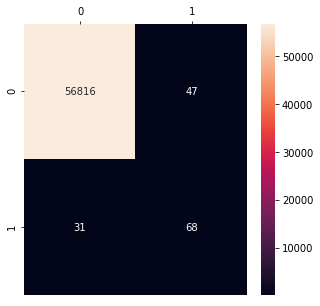

In [131]:
conf = confusion_matrix(label3_list, prediction3_list)
f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(conf, annot=True, ax=ax, fmt='d') 
ax.xaxis.set_ticks_position('top') 

In [132]:
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    TPP=(conf[0][1]+conf[1][1])
    PTP=conf[1][1]/(conf[0][1]+conf[1][1])
    F1=2*PTP*sen/(sen+PTP)
    
    print('total_num: ',total_num)
    print('TP: ',conf[0][0]) 
    print('FP: ',conf[0][1])
    print('TN: ',conf[1][0])
    print('FN: ',conf[1][1])
    
    print('sensitivity/Recall: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    print('Precision: ',PTP)
    print('F1 Score: ',F1)
    return total_num, sen, spe, false_positive_rate, false_negative_rate, PTP, F1

model_efficacy(conf)

total_num:  56962
TP:  56816
FP:  47
TN:  31
FN:  68
sensitivity/Recall:  0.999454676588
specificity:  0.686868686869
false_positive_rate:  0.408695652174
false_negative_rate:  0.000545323411965
Precision:  0.591304347826
F1 Score:  0.743018756017


(56962,
 0.99945467658803455,
 0.68686868686868685,
 0.40869565217391307,
 0.00054532341196545113,
 0.59130434782608698,
 0.74301875601715317)